# Introduction

** The Hazardous Impact of Pesticides **

Although many of us may not fully appreciate it, a farmer's profession demands immense endurance and determination. Once the seeds are sown, the farmer tirelessly works day and night to ensure a bountiful harvest at the end of the season. Various factors contribute to a successful harvest, including water availability, soil fertility, protection against rodents, timely use of pesticides and other beneficial chemicals, and the influence of nature. While some of these factors are beyond the farmer's control, the amount and frequency of pesticide application are within their grasp.

Pesticides play a crucial role in protecting crops when used in the correct dosage. However, exceeding the necessary amount can have devastating consequences, potentially ruining the entire harvest. An excessive pesticide level can render the crop either dead or unsuitable for consumption, among other possible outcomes. This information is derived from crops harvested by numerous farmers at the end of the harvest season. For the sake of simplification, let's assume that all other variables, such as variations in farming techniques, have been accounted for.

The objective is to assess the outcome of the harvest season, specifically whether the crop will be healthy (alive), damaged by pesticides, or affected by other reasons. The data utilized in this project has been sourced from the GitHub repository (https://github.com/jayita13/ML-in-Agriculture/tree/master).

# Import the necessary libraries

In [1]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import norm
import missingno as msno

from scipy import stats # Outliers
from statsmodels.stats.outliers_influence import variance_inflation_factor  # Collinearity
from sklearn.model_selection import train_test_split # Spliting data
from sklearn.preprocessing import LabelEncoder # Data transformation

from sklearn.preprocessing import MinMaxScaler # Scaling data

from sklearn.feature_selection import SelectKBest, f_regression # Feature selection

# Machine learning models (Classification)
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier # GradientBoostingClassifier
from xgboost import XGBClassifier # eXtreme Gradient Boosting
from lightgbm import LGBMClassifier # gradient boosting  that uses tree-based learning algorithms
from catboost import CatBoostClassifier # gradient boosting  working with categorical data
from sklearn.ensemble import AdaBoostClassifier # Adaptive Boosting

from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression #Logistique Regression
from sklearn.tree import plot_tree

import lightgbm as lgb
from sklearn.neural_network import MLPClassifier

# Inferential statistics
from scipy.stats import f_oneway # ANOVA
from scipy.stats import ttest_ind # t-test
from scipy.stats import chi2_contingency # Chi2

# Imputation
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer


# Evaluation metrics
from sklearn.metrics import f1_score, confusion_matrix, roc_auc_score, auc, roc_curve
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import classification_report
from sklearn.metrics import mean_absolute_error

# Import data

In [4]:
!git clone https://github.com/jayita13/ML-in-Agriculture.git

Cloning into 'ML-in-Agriculture'...
remote: Enumerating objects: 36, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (32/32), done.
remote: Total 36 (delta 13), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (36/36), 1.31 MiB | 4.54 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [5]:
cd     ML-in-Agriculture/ML on AGRICULTURE/data

/content/ML-in-Agriculture/ML on AGRICULTURE/data


In [6]:
data = pd.read_csv('train.csv')

# Data understand

## Data sheet

In [7]:
data.head(3)

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1


## Data Info

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88858 entries, 0 to 88857
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       88858 non-null  object 
 1   Estimated_Insects_Count  88858 non-null  int64  
 2   Crop_Type                88858 non-null  int64  
 3   Soil_Type                88858 non-null  int64  
 4   Pesticide_Use_Category   88858 non-null  int64  
 5   Number_Doses_Week        88858 non-null  int64  
 6   Number_Weeks_Used        79858 non-null  float64
 7   Number_Weeks_Quit        88858 non-null  int64  
 8   Season                   88858 non-null  int64  
 9   Crop_Damage              88858 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 6.8+ MB


** Data Description **

Variable	Definition

- ID:	UniqueID
- Estimated_Insects_Count:	Estimated insects count per square meter
- Crop_Type:	Category of Crop(0,1)
- Soil_Type:	Category of Soil (0,1)
- Pesticide_Use_Category:	Type of pesticides uses (1- Never, 2-Previously Used, 3-Currently Using)
- Number_Doses_Week:	Number of doses per week
- Number_Weeks_Used:	Number of weeks used
- Number_Weeks_Quit:	Number of weeks quit
- Season:	Season Category (1,2,3)
- Crop_Damage:	Crop Damage Category (0=alive, 1=Damage due to other causes, 2=Damage due to Pesticides)

## Data describe (descriptive statistics)

In [9]:
data = data.drop(columns=['ID'])

In [10]:
data.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,88858.000000,88858.000000,88858.000000,88858.000000,88858.000000,79858.000000,88858.000000,88858.000000,88858.000000
mean,1399.012210,0.284375,0.458417,2.264186,25.849952,28.623970,9.589986,1.896959,0.190562
std,849.048781,0.451119,0.498271,0.461772,15.554428,12.391881,9.900631,0.701322,0.454215
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,1898.000000,1.000000,1.000000,3.000000,40.000000,37.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [11]:
data.columns

Index(['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [12]:
Qual_Columns = ["Crop_Type" , "Soil_Type" , "Pesticide_Use_Category" , "Season" , "Crop_Damage"]
Quant_Columns = ["Estimated_Insects_Count" , "Number_Doses_Week" , "Number_Weeks_Used" , "Number_Weeks_Quit"]

## Data Vis

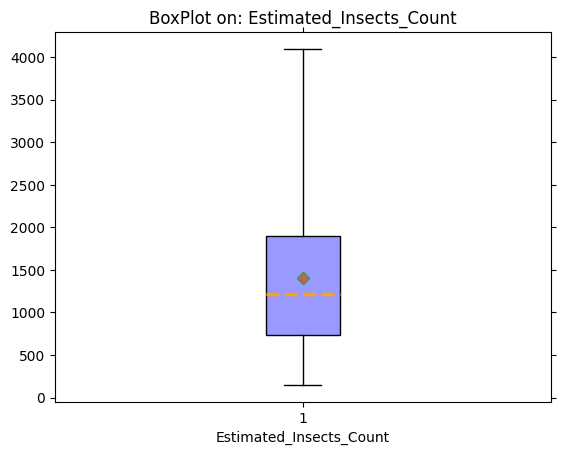

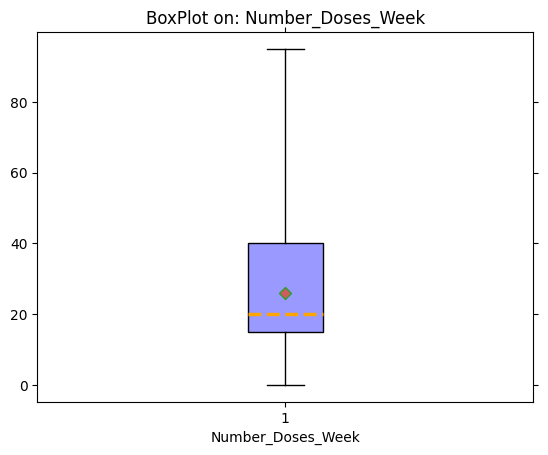

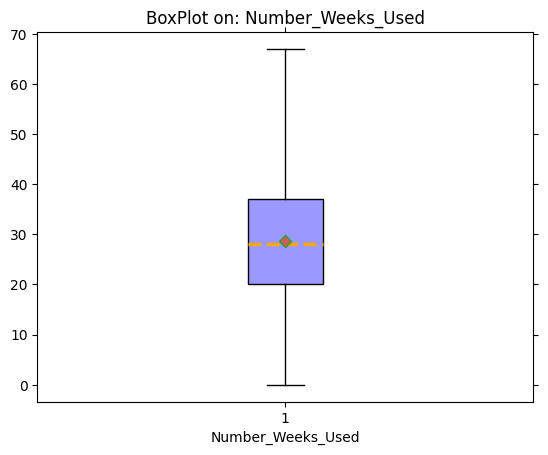

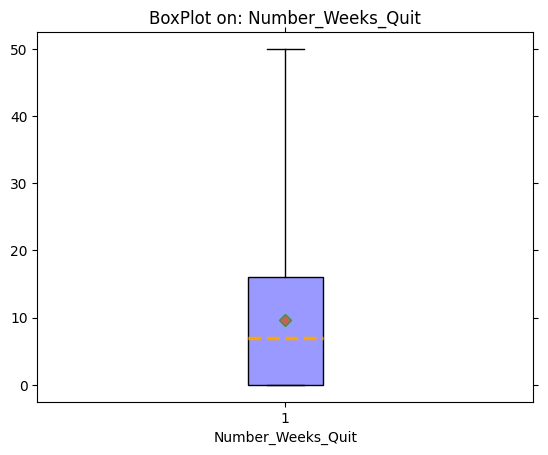

In [13]:
# Iterate over each column in Quant_Columns
# Drop missing values before plotting the boxplot
data_cleaned = data[Quant_Columns].dropna()

# Iterate over each column in Quant_Columns
for column in Quant_Columns:
    plt.boxplot(x=data_cleaned[column],
                whis=3,
                patch_artist=True,
                showmeans=True,
                boxprops={'color': 'black', 'facecolor': '#9999ff'},
                flierprops={'marker': 'o', 'markerfacecolor': 'red', 'color': 'black'},
                meanprops={'marker': 'D', 'markerfacecolor': 'indianred'},
                medianprops={'linestyle': '--', 'linewidth': 2.5, 'color': 'orange'})

    plt.tick_params(top='off', right='off')
    plt.xlabel(column)  # Set xlabel to the current column name
    plt.title(f"BoxPlot on: {column}")
    plt.show()

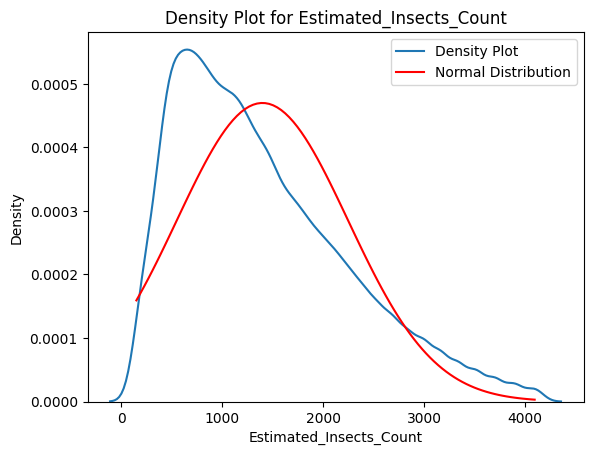

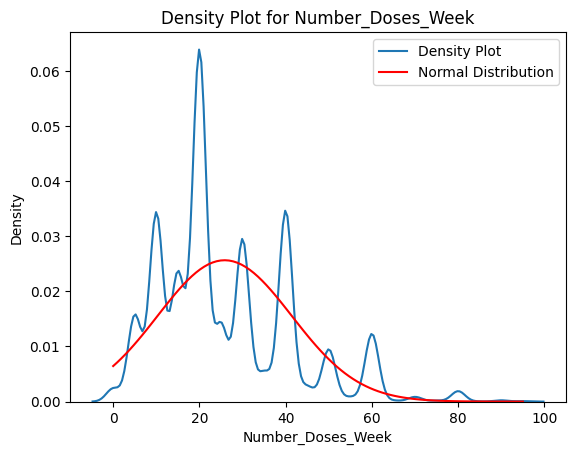

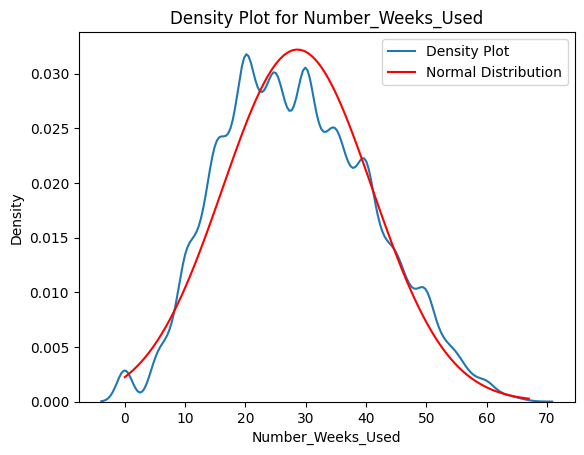

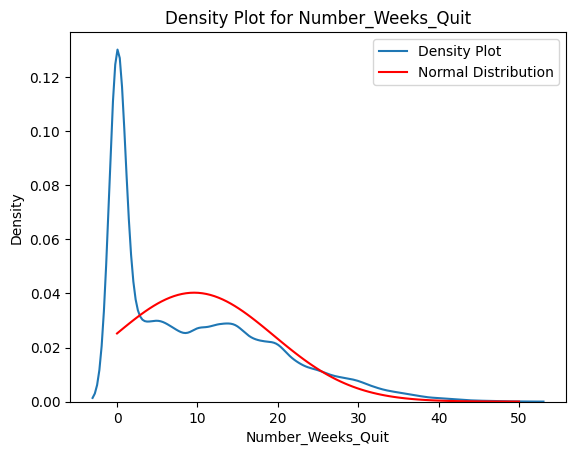

In [14]:
# Iterate over each column in Quant_Columns
for column in Quant_Columns:
    # Get the cleaned data (exclude non-finite values)
    cleaned_data = data[column]
    cleaned_data = cleaned_data[np.isfinite(cleaned_data)]

    # Calculate parameters of the normal distribution (mean and standard deviation)
    mean, std = norm.fit(cleaned_data)

    # Generate a sample of values for the probability density function of the normal distribution
    x = np.linspace(cleaned_data.min(), cleaned_data.max(), 100)
    y = norm.pdf(x, mean, std)

    # Plot the density plot with the normal distribution
    plt.figure()
    sns.kdeplot(data=cleaned_data, label="Density Plot")
    plt.plot(x, y, 'r-', label="Normal Distribution")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.legend()
    plt.title(f'Density Plot for {column}')
    plt.show()

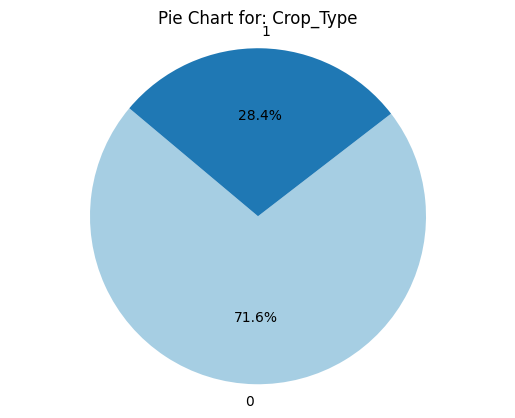

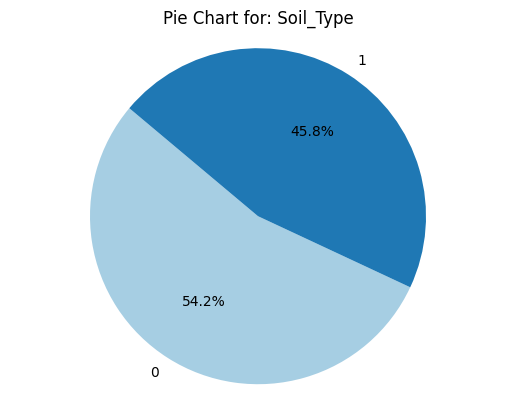

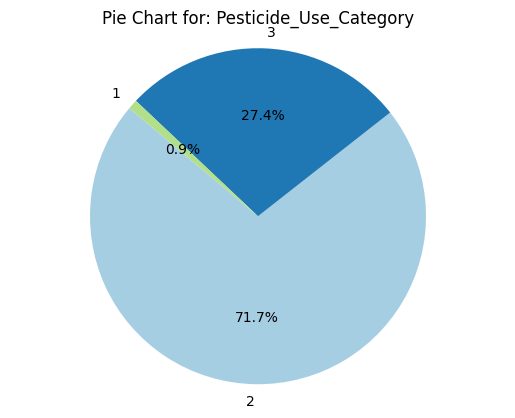

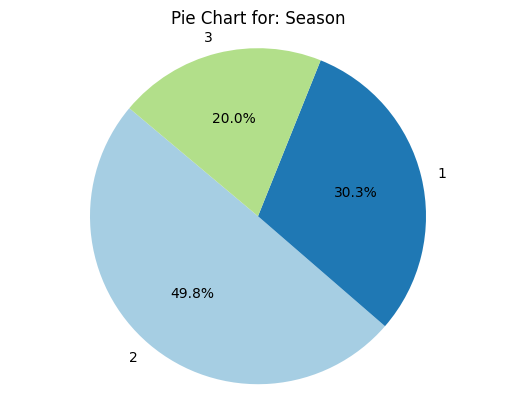

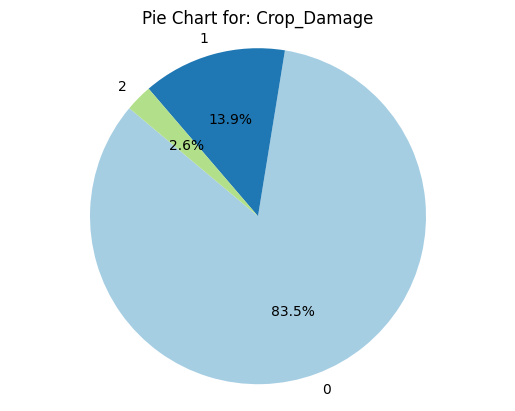

In [15]:
# Define a mapping for each qualitative column
column_mapping = {
    'Crop_Type': {0: 'typeA', 1: 'typeB'},
    'Soil_Type': {0: 'typeA', 1: 'typeB'},
    'Pesticide_Use_Category': {1: 'Never', 2: 'Previously Used', 3:'Currently Using'},
    'Season': {1: 'Season1', 2: 'Season2', 3:'Season3'},
    'Crop_Damage': {0: 'alive', 1: 'Damage due to other causes', 2: 'Damage due to Pesticides'}
}

# Iterate over each column in Qual_Columns
data_vis = data.copy()
for column in Qual_Columns:
    # Map numerical values to labels using the defined mapping
    data_vis[column] = data_vis[column].map(column_mapping.get(column, data_vis[column]))

    # Get value counts for the column
    value_counts = data[column].value_counts()
    labels = value_counts.index
    sizes = value_counts.values

    # Plot the pie chart
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
    plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
    plt.title(f"Pie Chart for: {column}")
    plt.show()

# Exploratory Data Analysis (EDA)

## Bivariate Analysis

<ipython-input-16-56e064dec2b8>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.loc[(data['Crop_Damage'] == 0), column], color='g', shade=True, label='alive')
<ipython-input-16-56e064dec2b8>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.loc[(data['Crop_Damage'] == 1), column], color='b', shade=True, label='Damage due to other causes')
<ipython-input-16-56e064dec2b8>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.loc[(data['Crop_Damage'] == 2), column], color='r', shade=True, label='Damage due to Pesticides')


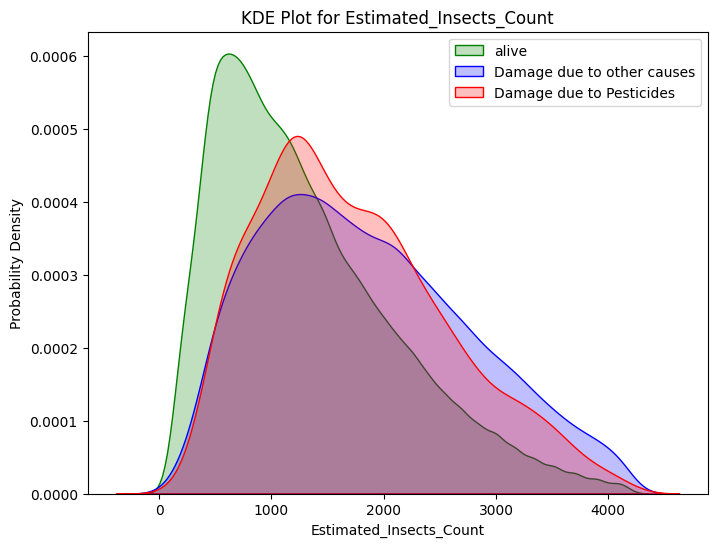

<ipython-input-16-56e064dec2b8>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.loc[(data['Crop_Damage'] == 0), column], color='g', shade=True, label='alive')
<ipython-input-16-56e064dec2b8>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.loc[(data['Crop_Damage'] == 1), column], color='b', shade=True, label='Damage due to other causes')
<ipython-input-16-56e064dec2b8>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.loc[(data['Crop_Damage'] == 2), column], color='r', shade=True, label='Damage due to Pesticides')


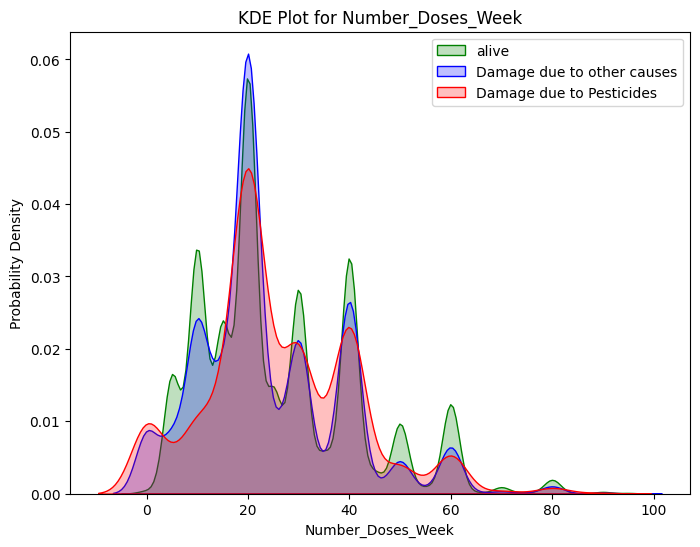

<ipython-input-16-56e064dec2b8>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.loc[(data['Crop_Damage'] == 0), column], color='g', shade=True, label='alive')
<ipython-input-16-56e064dec2b8>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.loc[(data['Crop_Damage'] == 1), column], color='b', shade=True, label='Damage due to other causes')
<ipython-input-16-56e064dec2b8>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.loc[(data['Crop_Damage'] == 2), column], color='r', shade=True, label='Damage due to Pesticides')


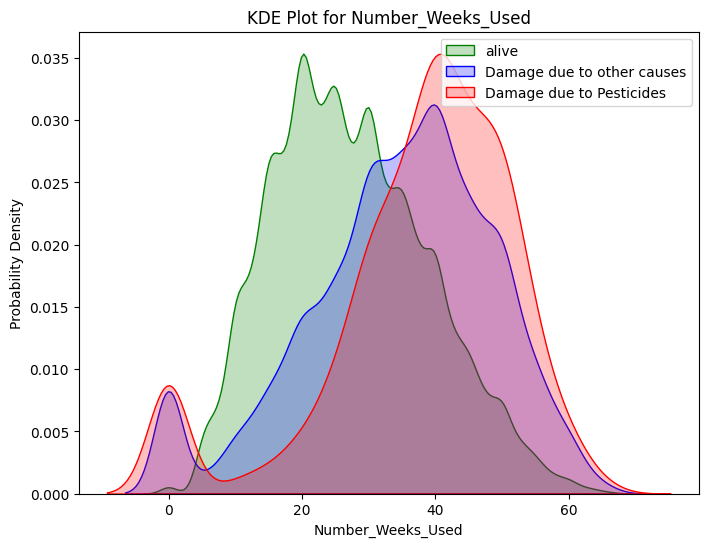

<ipython-input-16-56e064dec2b8>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.loc[(data['Crop_Damage'] == 0), column], color='g', shade=True, label='alive')
<ipython-input-16-56e064dec2b8>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.loc[(data['Crop_Damage'] == 1), column], color='b', shade=True, label='Damage due to other causes')
<ipython-input-16-56e064dec2b8>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.loc[(data['Crop_Damage'] == 2), column], color='r', shade=True, label='Damage due to Pesticides')


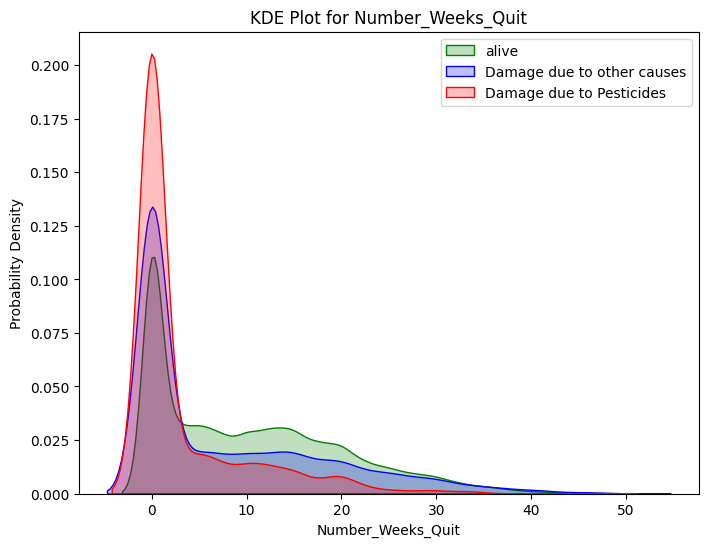

In [16]:
for column in ["Estimated_Insects_Count", "Number_Doses_Week", "Number_Weeks_Used", "Number_Weeks_Quit"]:
    plt.figure(figsize=(8, 6))

    sns.kdeplot(data.loc[(data['Crop_Damage'] == 0), column], color='g', shade=True, label='alive')
    sns.kdeplot(data.loc[(data['Crop_Damage'] == 1), column], color='b', shade=True, label='Damage due to other causes')
    sns.kdeplot(data.loc[(data['Crop_Damage'] == 2), column], color='r', shade=True, label='Damage due to Pesticides')

    plt.xlabel(column)
    plt.ylabel('Probability Density')
    plt.title(f'KDE Plot for {column}')
    plt.legend()
    plt.show()

In [ ]:

# Create a copy of the data with mapped values
data_copy = data.copy()

# Creating dataframes for each Crop_Damage category
Alive = data_copy[data_copy['Crop_Damage'] == 0]
Damage_Other = data_copy[data_copy['Crop_Damage'] == 1]
Damage_Pesticides = data_copy[data_copy['Crop_Damage'] == 2]

# List of columns to plot
columns_to_plot = ["Estimated_Insects_Count", "Number_Doses_Week", "Number_Weeks_Used", "Number_Weeks_Quit"]

# Plot cumulative step histograms for each column
for column in columns_to_plot:
    fig, ax = plt.subplots(figsize=(8, 4))

    n_alive, bins, patches = ax.hist(Alive[column], 10000, density=True, histtype='stepfilled',
                                     cumulative=True, label='Alive', alpha=0.5, color='C1')
    n_damage_other, bins, patches = ax.hist(Damage_Other[column], 10000, density=True,
                                            histtype='stepfilled', cumulative=True, label='Damage Other', alpha=0.5, color='C0')
    n_damage_pesticides, bins, patches = ax.hist(Damage_Pesticides[column], 10000, density=True,
                                                 histtype='stepfilled', cumulative=True, label='Damage Pesticides', alpha=0.5, color='C0')

    # Tidy up the figure
    ax.legend(loc='upper left')
    ax.set_title(f'Cumulative step histograms for {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Cumulative Proportion')
    plt.show()

In [ ]:
# Create a copy of the data with transformed 'Crop_Damage' values
data_copy = data.copy()
data_copy['Crop_Damage'] = data_copy['Crop_Damage'].map({0: 'Alive', 1: 'Damage due to Other Causes', 2: 'Damage due to Pesticides'})

# Define damage labels for the legend
damage_labels = ['Alive', 'Damage due to Other Causes', 'Damage due to Pesticides']

# Plot box plots for each variable
for column in ["Estimated_Insects_Count", "Number_Doses_Week", "Number_Weeks_Used", "Number_Weeks_Quit"]:
    plt.figure(figsize=(8, 6))

    sns.boxplot(x='Crop_Damage', y=column, data=data_copy, palette=['g', 'b', 'r'],
                order=damage_labels, width=0.7)

    plt.xlabel('Crop Damage')
    plt.ylabel(column)
    plt.title(f'Box Plot for {column}')
    plt.show()

In [ ]:
# Create a copy of the data
data_copy = data.copy()

# Study relationship of count and continuous variables
continuous_cols = ["Estimated_Insects_Count", "Number_Doses_Week", "Number_Weeks_Used", "Number_Weeks_Quit"]

for col in continuous_cols:
    plt.figure(figsize=(8, 6))

    # Plotting mean Crop_Damage for each bin
    a = data_copy.groupby(pd.qcut(data_copy[col], 20, duplicates='drop'))[[col, 'Crop_Damage']].mean()
    plt.plot(a[col], a['Crop_Damage'], label='Mean Crop_Damage', color='blue')

    # Scatter plot for individual points
    b = data_copy.groupby([col], as_index=False)[['Crop_Damage']].mean()
    plt.scatter(b[col], b['Crop_Damage'], color='orange', s=10, label='Individual Points')

    plt.title(f'Crop Damage vs {col}')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Crop Damage Rate', fontsize=12)
    plt.legend()
    plt.show()

In [ ]:
# Create a copy of the data with transformed 'Crop_Damage' values

# Define column mapping for x-labels
column_mapping = {
    'Crop_Type': {0: 'typeA', 1: 'typeB'},
    'Soil_Type': {0: 'typeA', 1: 'typeB'},
    'Pesticide_Use_Category': {1: 'Never', 2: 'Previously Used', 3: 'Currently Using'},
    'Season': {1: 'Season1', 2: 'Season2', 3: 'Season3'},
    'Crop_Damage': {0: 'alive', 1: 'Damage due to other causes', 2: 'Damage due to Pesticides'}
}

# Create a copy of the data with mapped values
data_copy = data.copy()

for column, mapping in column_mapping.items():
    data_copy[column] = data_copy[column].replace(mapping)

# Define damage labels for the legend
damage_labels = ['alive', 'Damage due to Other Causes', 'Damage due to Pesticides']



# Plot bar plots for each variable
for column in ["Crop_Type", "Soil_Type", "Pesticide_Use_Category", "Season", "Crop_Damage"]:
    plt.figure(figsize=(8, 6))

    sns.countplot(x=column, hue='Crop_Damage', data=data_copy, palette=['g', 'b', 'r'],
                  order=column_mapping[column].values(), hue_order=damage_labels)

    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Bar Plot for {column} by Crop Damage')
    plt.legend(title='Damage Type', labels=damage_labels)
    plt.show()

## Data Storytelling

In [ ]:
# Calculate and plot correlation matrix with a light color for low correlation
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Use 'coolwarm' colormap with a light color for low correlation
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, mask=mask)

plt.title('Correlation Matrix (Upper Triangle Only)')
plt.show()

## Inferential Statistics

If you want to perform inferential statistics for continuous variables ("Estimated_Insects_Count", "Number_Doses_Week", "Number_Weeks_Used", "Number_Weeks_Quit") with respect to the categorical target variable 'Crop_Damage', you can use statistical tests such as the t-test or Mann-Whitney U test for two groups, or ANOVA or Kruskal-Wallis test for multiple groups, depending on the assumptions and nature of your data.

When dealing with qualitative variables and a categorical target variable like 'Crop_Damage', you can use statistical tests such as the chi-squared test for independence to assess whether there is a significant association between the variables. Below is an example using the chi-squared test for each pair of qualitative variables in Qual_Columns and the target variable 'Crop_Damage'.

In [18]:
Qual_Columns = ["Crop_Type" , "Soil_Type" , "Pesticide_Use_Category" , "Season" , "Crop_Damage"]
Quant_Columns = ["Estimated_Insects_Count" , "Number_Doses_Week" , "Number_Weeks_Used" , "Number_Weeks_Quit"]

In [19]:
# Assuming 'data' is your original DataFrame
data_copy_without_nan = data.dropna().copy()

qualitative_cols = ["Crop_Type", "Soil_Type", "Pesticide_Use_Category", "Season"]
target_variable = 'Crop_Damage'

for col in qualitative_cols:
    # Create a contingency table
    contingency_table = pd.crosstab(data_copy_without_nan[col], data_copy_without_nan[target_variable])

    # Perform chi-squared test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

    # Display results
    print(f"Chi-squared test for independence between {col} and {target_variable}:")
    print(f"Chi-squared statistic: {chi2_stat}")
    print(f"P-value: {p_value}")
    print(f"Degrees of freedom: {dof}")
    print(f"{'-'*40}")

Chi-squared test for independence between Crop_Type and Crop_Damage:
Chi-squared statistic: 61.4581345358056
P-value: 4.5137307732909087e-14
Degrees of freedom: 2
----------------------------------------
Chi-squared test for independence between Soil_Type and Crop_Damage:
Chi-squared statistic: 50.89260376398882
P-value: 8.888152711344361e-12
Degrees of freedom: 2
----------------------------------------
Chi-squared test for independence between Pesticide_Use_Category and Crop_Damage:
Chi-squared statistic: 7057.852053039847
P-value: 0.0
Degrees of freedom: 4
----------------------------------------
Chi-squared test for independence between Season and Crop_Damage:
Chi-squared statistic: 6.461792873982086
P-value: 0.16721371691237186
Degrees of freedom: 4
----------------------------------------


In [20]:
data_copy_without_nan = data.dropna().copy()

continuous_cols = ["Estimated_Insects_Count", "Number_Doses_Week", "Number_Weeks_Used", "Number_Weeks_Quit"]
target_variable = 'Crop_Damage'

for col in continuous_cols:
    # Extract unique levels of 'Crop_Damage'
    crop_damage_levels = data_copy_without_nan[target_variable].unique()

    # Perform t-test for each pair of 'Crop_Damage' levels
    for i in range(len(crop_damage_levels)):
        for j in range(i + 1, len(crop_damage_levels)):
            group1 = data_copy_without_nan[data_copy_without_nan[target_variable] == crop_damage_levels[i]][col]
            group2 = data_copy_without_nan[data_copy_without_nan[target_variable] == crop_damage_levels[j]][col]

            # Perform t-test
            t_statistic, p_value = ttest_ind(group1, group2)

            # Display results
            print(f"{col} between {crop_damage_levels[i]} and {crop_damage_levels[j]}:")
            print(f"T-statistic: {t_statistic}")
            print(f"P-value: {p_value}")
            print(f"{'-'*40}")

Estimated_Insects_Count between 0 and 1:
T-statistic: -61.51661052240988
P-value: 0.0
----------------------------------------
Estimated_Insects_Count between 0 and 2:
T-statistic: -23.374141683570308
P-value: 2.3132865286910547e-120
----------------------------------------
Estimated_Insects_Count between 1 and 2:
T-statistic: 4.477760577079498
P-value: 7.606694749963523e-06
----------------------------------------
Number_Doses_Week between 0 and 1:
T-statistic: 12.246882086961383
P-value: 1.8782958863455126e-34
----------------------------------------
Number_Doses_Week between 0 and 2:
T-statistic: -0.06984772644311564
P-value: 0.9443150627113401
----------------------------------------
Number_Doses_Week between 1 and 2:
T-statistic: -5.646232844707428
P-value: 1.674057832215552e-08
----------------------------------------
Number_Weeks_Used between 0 and 1:
T-statistic: -58.84844952156064
P-value: 0.0
----------------------------------------
Number_Weeks_Used between 0 and 2:
T-statis

In [21]:
# ANOVA
data_copy_without_nan = data.dropna().copy()

continuous_cols = ["Estimated_Insects_Count", "Number_Doses_Week", "Number_Weeks_Used", "Number_Weeks_Quit"]
target_variable = 'Crop_Damage'

for col in continuous_cols:
    # Extract unique levels of 'Crop_Damage'
    crop_damage_levels = data_copy_without_nan[target_variable].unique()

    # Create a list to store the data for each 'Crop_Damage' level
    data_by_damage = [data_copy_without_nan[data_copy_without_nan[target_variable] == damage_level][col] for damage_level in crop_damage_levels]

    # Perform ANOVA
    f_statistic, p_value = f_oneway(*data_by_damage)

    # Display results
    print(f"{col} vs {target_variable}:")
    print(f"F-statistic: {f_statistic}")
    print(f"P-value: {p_value}")
    print(f"{'-'*40}")

Estimated_Insects_Count vs Crop_Damage:
F-statistic: 2069.9459640617424
P-value: 0.0
----------------------------------------
Number_Doses_Week vs Crop_Damage:
F-statistic: 75.54055327241551
P-value: 1.675520733537405e-33
----------------------------------------
Number_Weeks_Used vs Crop_Damage:
F-statistic: 2340.387754217214
P-value: 0.0
----------------------------------------
Number_Weeks_Quit vs Crop_Damage:
F-statistic: 737.2212607659443
P-value: 5.607976e-318
----------------------------------------


# Data processing

## Missing Value

In [22]:
# Calculate the percentage of missing values for each column
missing_percent = (data.isnull().sum() / len(data)) * 100

In [23]:
missing_percent

Estimated_Insects_Count     0.00000
Crop_Type                   0.00000
Soil_Type                   0.00000
Pesticide_Use_Category      0.00000
Number_Doses_Week           0.00000
Number_Weeks_Used          10.12852
Number_Weeks_Quit           0.00000
Season                      0.00000
Crop_Damage                 0.00000
dtype: float64

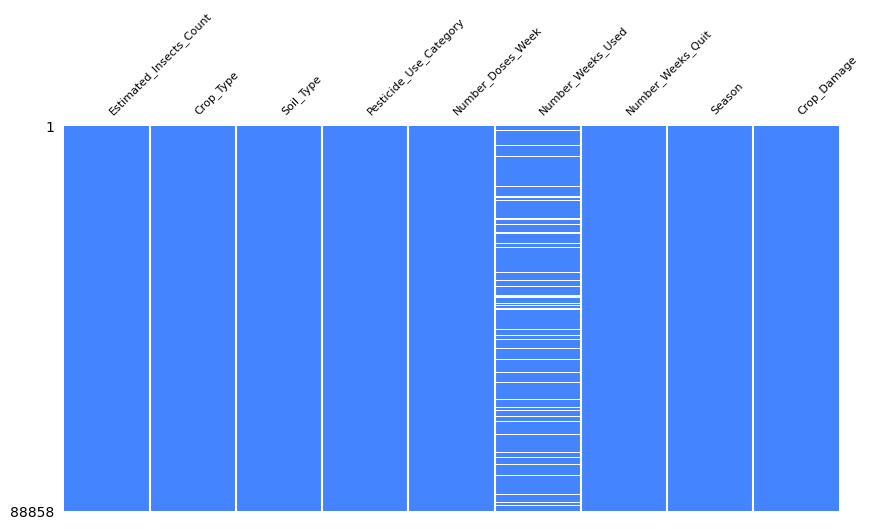

In [24]:
# Visualize missing values
msno.matrix(data, sparkline=False, figsize=(10, 5), fontsize=8, color=(0.27, 0.52, 1.0))
plt.show()

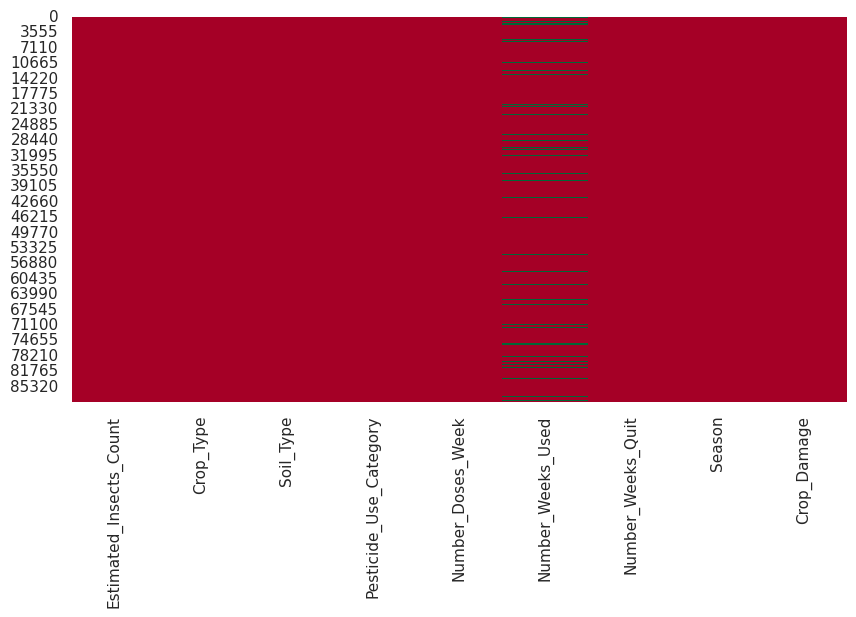

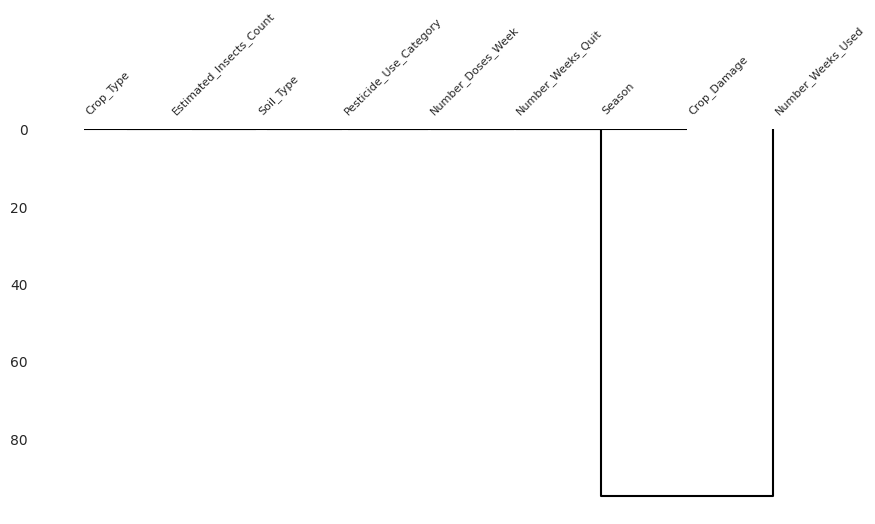

In [25]:
sns.set(style="white")
plt.figure(figsize=(10, 5))
sns.heatmap(data.isnull(), cmap="RdYlGn", cbar=False)
plt.show()

msno.dendrogram(data, figsize=(10, 5), fontsize=8)
plt.show()

Handling missing data:
          
We observe a 10.12% missing value for the Number_Weeks_Used variable. The decision made is to impute observations with missing values by :  
- Single imputation :mean, median, mode
- Model-based imputation : KNN imputation, Regression, Maximum likelihood estimation

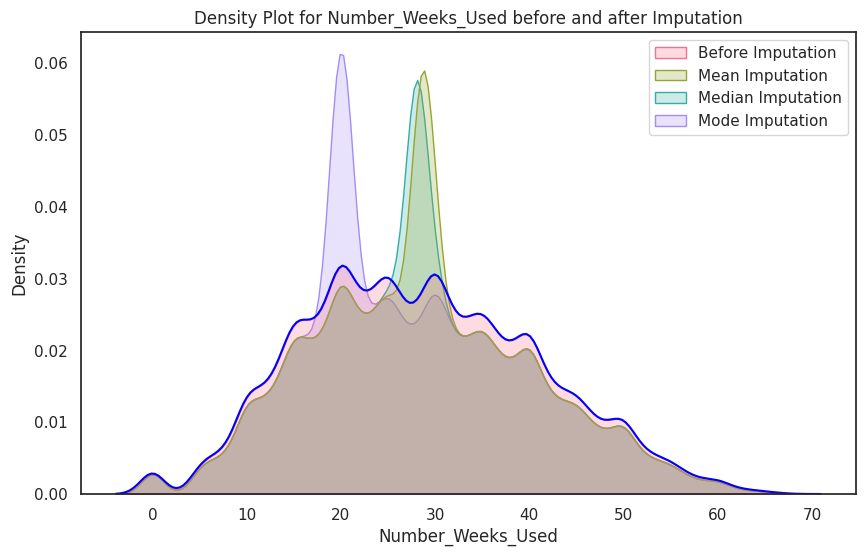

In [26]:
# Extract the column with missing values
column_to_impute = "Number_Weeks_Used"

# Plot density before imputation
plt.figure(figsize=(10, 6))
sns.kdeplot(data[column_to_impute].dropna(), label='Before Imputation', color='blue')

# Impute missing values with mean, median, and mode
mean_imputed_data = data.copy()
mean_imputed_data[column_to_impute].fillna(data[column_to_impute].mean(), inplace=True)

median_imputed_data = data.copy()
median_imputed_data[column_to_impute].fillna(data[column_to_impute].median(), inplace=True)

mode_imputed_data = data.copy()
mode_imputed_data[column_to_impute].fillna(data[column_to_impute].mode()[0], inplace=True)

# Combine datasets before and after imputation
imputed_data = pd.concat([
    data[column_to_impute].dropna(),
    mean_imputed_data[column_to_impute],
    median_imputed_data[column_to_impute],
    mode_imputed_data[column_to_impute]
], axis=1, keys=['Before Imputation', 'Mean Imputation', 'Median Imputation', 'Mode Imputation'])

# Plot density after imputation
sns.kdeplot(data=imputed_data, fill=True, common_norm=False, palette="husl")
plt.title(f'Density Plot for {column_to_impute} before and after Imputation')
plt.xlabel(column_to_impute)
plt.ylabel('Density')
plt.show()

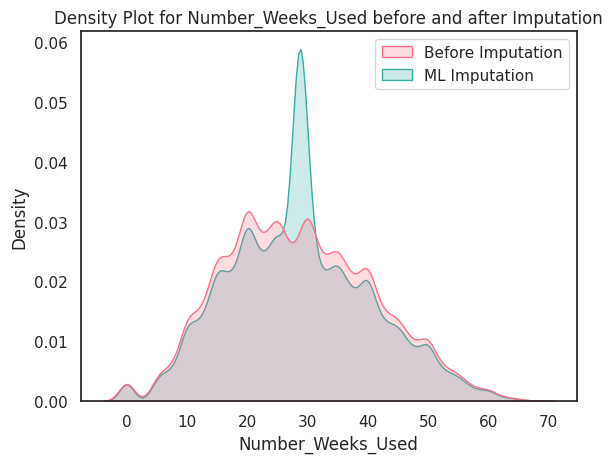

In [27]:
# Maximum likelihood imputation using mean
data_imputed_ml = data.copy()
imputer = SimpleImputer(strategy='mean')
data_imputed_ml[column_to_impute] = imputer.fit_transform(data[column_to_impute].values.reshape(-1, 1))

# Combine datasets before and after imputation
imputed_data = pd.concat([
    data[column_to_impute].dropna(),
    data_imputed_ml[column_to_impute],
], axis=1, keys=['Before Imputation',   'ML Imputation'])

# Plot density after imputation
sns.kdeplot(data=imputed_data, fill=True, common_norm=False, palette="husl")
plt.title(f'Density Plot for {column_to_impute} before and after Imputation')
plt.xlabel(column_to_impute)
plt.ylabel('Density')
plt.show()

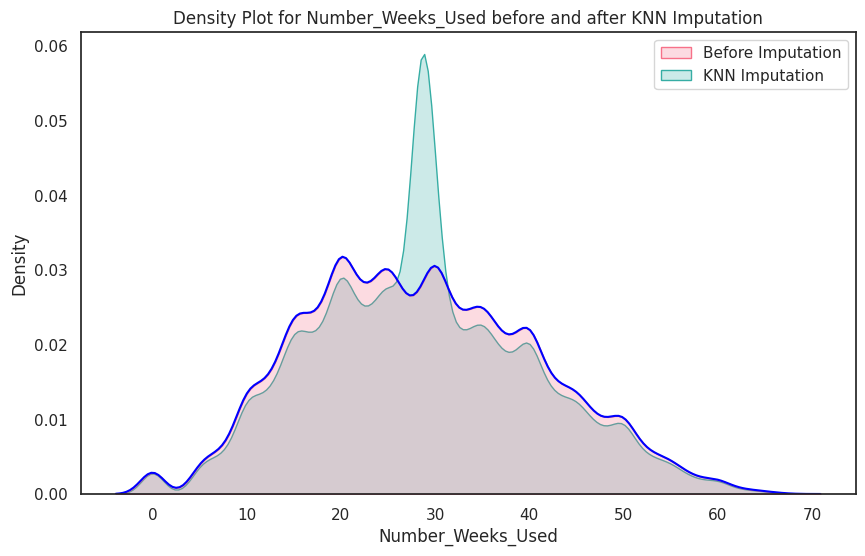

In [28]:
# Extract the column with missing values
column_to_impute = "Number_Weeks_Used"

# Plot density before imputation
plt.figure(figsize=(10, 6))
sns.kdeplot(data[column_to_impute].dropna(), label='Before Imputation', color='blue')

# KNN imputation
knn_imputer_data = data.copy()
knn_imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_imputer_data[column_to_impute] = knn_imputer.fit_transform(data[[column_to_impute]])

# Combine datasets before and after imputation
imputed_data = pd.concat([
    data[column_to_impute].dropna(),
    knn_imputer_data[column_to_impute],
], axis=1, keys=['Before Imputation', 'KNN Imputation'])

# Plot density after imputation
sns.kdeplot(data=imputed_data, fill=True, common_norm=False, palette="husl")
plt.title(f'Density Plot for {column_to_impute} before and after KNN Imputation')
plt.xlabel(column_to_impute)
plt.ylabel('Density')
plt.show()

In [29]:
# Drop rows with missing values
data_cleaned = data.dropna()

In [30]:
data_cleaned.head(3)

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,188,1,0,1,0,0.0,0,1,0
1,209,1,0,1,0,0.0,0,2,1
2,257,1,0,1,0,0.0,0,2,1


## Spliting Data

In [37]:
# Specify your features (X) and target variable (y)
X = data_cleaned.drop(columns=['Crop_Damage'])  # Features
y = data_cleaned['Crop_Damage']  # Target variable

# Split the data into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (55900, 8)
X_test shape: (23958, 8)
y_train shape: (55900,)
y_test shape: (23958,)


## Scaling data

In [38]:
# Compute mean, std, min and max values for each column in data
min_values = X_train.min()
max_values = X_train.max()
mean_values = X_train.mean()
std_values = X_train.std()

### Min-Max

In [39]:
# Min-Max Scaling for X_train
X_train_mm = (X_train - min_values) / (max_values - min_values)
# Apply the same scaling to X_test
X_test_mm = (X_test - min_values) / (max_values - min_values)

### Standardization

In [40]:
# Standardization Scaling for X_train
X_train_std = (X_train - mean_values) / std_values
# Apply the same scaling to X_test
X_test_std = (X_test - mean_values) / std_values

## Feature selection

In [41]:
# Use SelectKBest with f_regression (for regression problems)
k_best = 5  # Number of top features to select
selector = SelectKBest(f_regression, k=k_best)

# Fit the selector on the training data
X_train_selected = selector.fit_transform(X_train_std, y_train_std)

# Get the selected feature indices
selected_indices = selector.get_support(indices=True)
# Get the names of the selected features
selected_features = X_train_std.columns[selected_indices]
# Print the names of the selected features
print(f"Selected Features: {selected_features}")

Selected Features: Index(['Estimated_Insects_Count', 'Pesticide_Use_Category',
       'Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit'],
      dtype='object')


In [42]:
X_train = X_train_std[selected_features]
X_test = X_test_std[selected_features]

# Modeling

## Training Models

In [43]:
# XGBoost
model_XGB = XGBClassifier(n_estimators=1000, num_class = 3)
model_XGB.fit(X_train,y_train,early_stopping_rounds=5,
             eval_set=[(X_test, y_test)],
             verbose=False)
print(model_XGB.score(X_train,y_train))
print("The best score:" , model_XGB.best_score)
print("Return the evaluation results:" , model_XGB.evals_result)
print("Feature importances :" , model_XGB.feature_importances_)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


0.8500894454382827
The best score: 0.4253544853341797
Return the evaluation results: <bound method XGBModel.evals_result of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)>
Feature importances : [0.07321148 0.64015555 0.06640704 0.1509691  0.06925683]


In [44]:
# CATBoost
model_CatB = CatBoostClassifier(verbose=0, n_estimators=100)
model_CatB.fit(X_train,y_train,early_stopping_rounds=5,
             eval_set=[(X_test, y_test)],
             verbose=False)

print("the number of trees in the model:" , model_CatB.tree_count_)
print("the calculated feature importances:" , model_CatB.feature_importances_)
print("best score:" , model_CatB.best_score_)

the number of trees in the model: 48
the calculated feature importances: [21.5694534  24.64205524 18.73053436 26.51128404  8.54667296]
best score: {'learn': {'MultiClass': 0.4148190751979637}, 'validation': {'MultiClass': 0.4270161590336974}}


In [45]:
# Lgbm
model_lgbm = LGBMClassifier(verbose=0, n_estimators=1000,learning_rate=0.05, n_jobs=4)
model_lgbm.fit(X_train,y_train,
             eval_set=[(X_test, y_test)])

print("The best score of fitted model:" , model_lgbm.best_score_)
print("The feature importances :" , model_lgbm.feature_importances_)

The best score of fitted model: defaultdict(<class 'collections.OrderedDict'>, {'valid_0': OrderedDict([('multi_logloss', 0.4427018830619996)])})
The feature importances : [29297  1491 15369 26304 17539]


In [46]:
# Random Forest
model_rf = RandomForestClassifier(oob_score = True, n_estimators=100)
model_rf.fit(X_train,y_train)


RandomForestClassifier(oob_score=True)

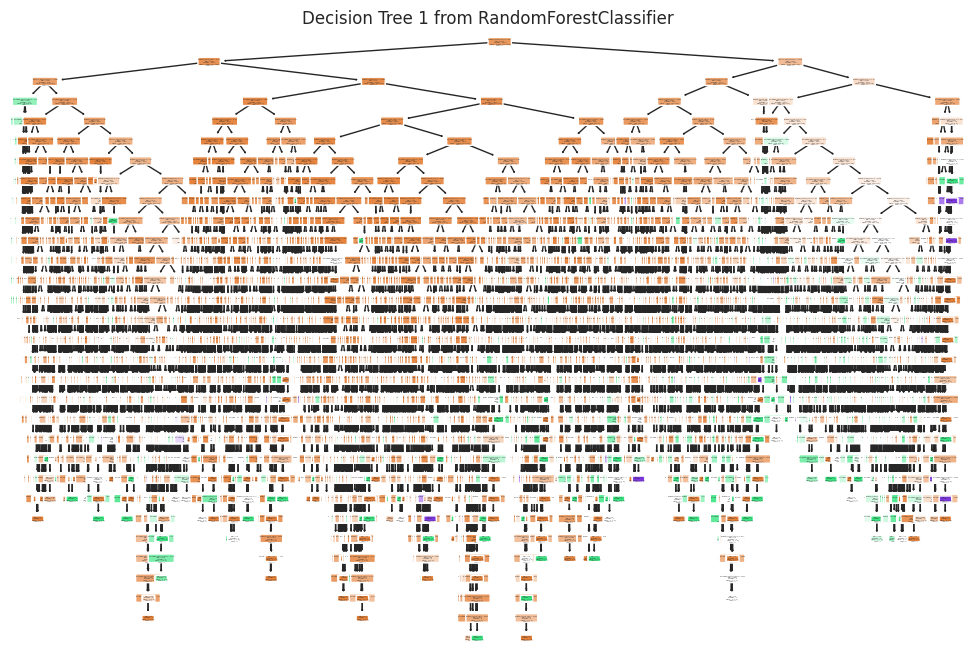

In [ ]:
# Feature names
feature_names = ['Estimated_Insects_Count', 'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used', 'Number_Weeks_Quit']

# Convert X_train features to strings
X_train_str = np.array(X_train, dtype=str)
y_train_str = np.array(y_train, dtype=str)
# Create a RandomForestClassifier
model_rf = RandomForestClassifier(oob_score=True, n_estimators=100)
model_rf.fit(X_train_str, y_train_str)

# Select one tree from the forest (e.g., the first tree)
tree_number = 0
estimator = model_rf.estimators_[tree_number]

# Plot the decision tree
plt.figure(figsize=(12, 8))
plot_tree(estimator, filled=True, feature_names=feature_names, class_names=model_rf.classes_, rounded=True)
plt.title(f'Decision Tree {tree_number + 1} from RandomForestClassifier')
plt.show()

In [47]:
# SVM
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model_svm = make_pipeline(StandardScaler(),LinearSVC(random_state=0, tol=1e-5))
model_svm.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

In [48]:
model_svm = LinearSVC(random_state=0, tol=1e-5)
model_svm.fit(X_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(random_state=0, tol=1e-05)

In [ ]:
# SGD
from sklearn.linear_model import SGDClassifier

model_sgd = make_pipeline(StandardScaler(),
                    SGDClassifier(max_iter=1000, tol=1e-3))
model_sgd.fit(X_train,y_train)


In [49]:
from sklearn.linear_model import SGDClassifier
model_sgd = SGDClassifier(max_iter=1000, tol=1e-3)
model_sgd.fit(X_train,y_train)

SGDClassifier()

In [50]:
# Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)


LogisticRegression()

# Evaluation

In [51]:
pred_XGB = model_XGB.predict(X_test)
mae_XGB = mean_absolute_error(pred_XGB,y_test)
print(classification_report(y_test, pred_XGB))
print("Mean Absolute Error:" , mae_XGB)
pred_CatB = model_CatB.predict(X_test)
mae_CatB = mean_absolute_error(pred_CatB,y_test)
print(model_CatB.score(X_train,y_train))
print(classification_report(y_test, pred_CatB))
print("Mean Absolute Error:" , mae_CatB)
pred_lgbm = model_lgbm.predict(X_test)
mae_lgbm = mean_absolute_error(pred_lgbm,y_test)
print(model_lgbm.score(X_test,y_test))
print(classification_report(y_test, pred_lgbm))
print("Mean Absolute Error:" , mae_lgbm)
pred_rf = model_rf.predict(X_test)
#mae_rf = mean_absolute_error(pred_rf,y_test)
#print(classification_report(y_test, pred_rf))
#print("Mean Absolute Error:" , mae_rf)
pred_svm = model_svm.predict(X_test)
mae_svm = mean_absolute_error(pred_svm,y_test)
print(classification_report(y_test, pred_svm))
print("Mean Absolute Error:" , mae_svm)
pred_sgd = model_sgd.predict(X_test)
mae_sgd = mean_absolute_error(pred_sgd,y_test)
print(classification_report(y_test, pred_sgd))
print("Mean Absolute Error:" , mae_sgd)
pred_lr = model_lr.predict(X_test)
mae_lr = mean_absolute_error(pred_lr,y_test)
print(classification_report(y_test, pred_lr))
print("Mean Absolute Error:" , mae_lr)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     19966
           1       0.54      0.18      0.27      3346
           2       0.20      0.00      0.00       646

    accuracy                           0.85     23958
   macro avg       0.53      0.39      0.40     23958
weighted avg       0.80      0.85      0.80     23958

Mean Absolute Error: 0.17342849987478087
0.8466189624329159
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     19966
           1       0.55      0.14      0.22      3346
           2       0.00      0.00      0.00       646

    accuracy                           0.84     23958
   macro avg       0.47      0.38      0.38     23958
weighted avg       0.79      0.84      0.80     23958

Mean Absolute Error: 0.17643375907838718


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8430169463227315
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     19966
           1       0.51      0.22      0.31      3346
           2       0.12      0.00      0.01       646

    accuracy                           0.84     23958
   macro avg       0.50      0.40      0.41     23958
weighted avg       0.80      0.84      0.81     23958

Mean Absolute Error: 0.1753902662993572
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     19966
           1       0.44      0.01      0.02      3346
           2       0.00      0.00      0.00       646

    accuracy                           0.83     23958
   macro avg       0.43      0.34      0.31     23958
weighted avg       0.76      0.83      0.76     23958

Mean Absolute Error: 0.19383921863260706
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     19966
           1       0.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

# SMOTE (oversample)

Class=0, n=46777 (83.680%)
Class=1, n=7713 (13.798%)
Class=2, n=1410 (2.522%)


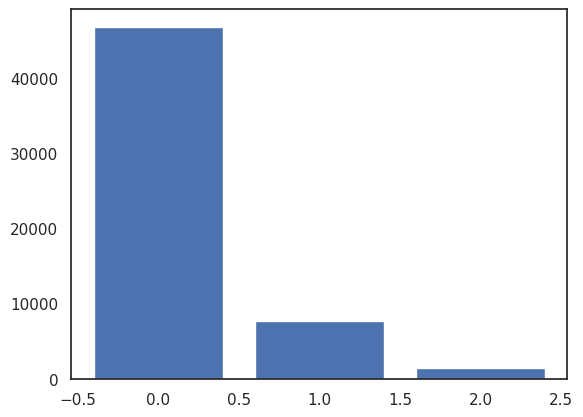

In [52]:
# load and summarize the dataset
from pandas import read_csv
from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
# define the dataset location

# split into input and output elements
# X_train, X_test,  y_train, y_test
# label encode the target variable
y = LabelEncoder().fit_transform(y_train)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=46777 (33.333%)
Class=1, n=46777 (33.333%)
Class=2, n=46777 (33.333%)


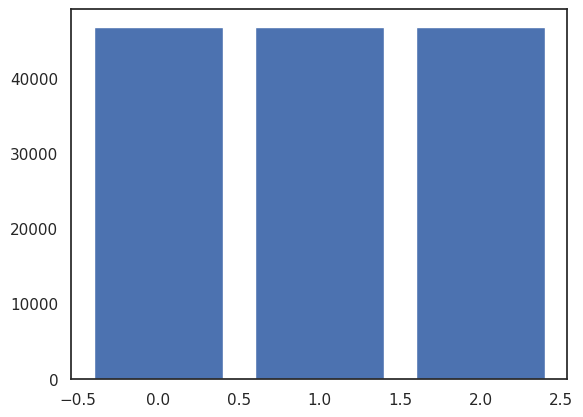

In [54]:
from imblearn.over_sampling import SMOTE
# label encode the target variable
y = LabelEncoder().fit_transform(y_train)
# transform the dataset
############# strategy = {0:100, 1:100, 2:200, 3:200, 4:200, 5:200}
############# oversample = SMOTE(sampling_strategy=strategy)
oversample = SMOTE()
X, y = oversample.fit_resample(X_train, y_train)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [55]:
# XGBoost
model_XGB_smote = XGBClassifier(n_estimators=1000, num_class = 3)
model_XGB_smote.fit(X_train,y_train,early_stopping_rounds=5,
             eval_set=[(X_test, y_test)],
             verbose=False)
# CATBoost
model_CatB_smote = CatBoostClassifier(verbose=0, n_estimators=100)
model_CatB_smote.fit(X_train,y_train,early_stopping_rounds=5,
             eval_set=[(X_test, y_test)],
             verbose=False)
# Lgbm
model_lgbm_smote = LGBMClassifier(verbose=0, n_estimators=1000,learning_rate=0.05, n_jobs=4)
model_lgbm_smote.fit(X_train,y_train,
             eval_set=[(X_test, y_test)])
# Random Forest
model_rf_smote = RandomForestClassifier(oob_score = True, n_estimators=100)
model_rf_smote.fit(X_train,y_train)
# SVM
model_svm_smote = LinearSVC(random_state=0, tol=1e-5)
model_svm_smote.fit(X_train,y_train)
# SGD
model_sgd_smote = SGDClassifier(max_iter=1000, tol=1e-3)
model_sgd_smote.fit(X_train,y_train)
# Logistic Regression
model_lr_smote = LogisticRegression()
model_lr_smote.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression()

In [56]:
pred_XGB_smote = model_XGB_smote.predict(X_test)
mae_XGB_smote = mean_absolute_error(pred_XGB_smote,y_test)
print(classification_report(y_test, pred_XGB_smote))
print("Mean Absolute Error:" , mae_XGB_smote)
pred_CatB_smote = model_CatB_smote.predict(X_test)
mae_CatB_smote = mean_absolute_error(pred_CatB_smote,y_test)
print(model_CatB_smote.score(X_train,y_train))
print(classification_report(y_test, pred_CatB_smote))
print("Mean Absolute Error:" , mae_CatB_smote)
pred_lgbm_smote = model_lgbm_smote.predict(X_test)
mae_lgbm_smote = mean_absolute_error(pred_lgbm_smote,y_test)
print(model_lgbm_smote.score(X_test,y_test))
print(classification_report(y_test, pred_lgbm_smote))
print("Mean Absolute Error:" , mae_lgbm_smote)
pred_rf_smote = model_rf_smote.predict(X_test)
#mae_rf_smote = mean_absolute_error(pred_rf_smote,y_test)
#print(classification_report(y_test, pred_rf_smote))
#print("Mean Absolute Error:" , mae_rf_smote)
pred_svm_smote = model_svm_smote.predict(X_test)
mae_svm_smote = mean_absolute_error(pred_svm_smote,y_test)
print(classification_report(y_test, pred_svm_smote))
print("Mean Absolute Error:" , mae_svm_smote)
pred_sgd_smote = model_sgd_smote.predict(X_test)
mae_sgd_smote = mean_absolute_error(pred_sgd_smote,y_test)
print(classification_report(y_test, pred_sgd_smote))
print("Mean Absolute Error:" , mae_sgd_smote)
pred_lr_smote = model_lr_smote.predict(X_test)
mae_lr_smote = mean_absolute_error(pred_lr_smote,y_test)
print(classification_report(y_test, pred_lr_smote))
print("Mean Absolute Error:" , mae_lr_smote)

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     19966
           1       0.54      0.18      0.27      3346
           2       0.20      0.00      0.00       646

    accuracy                           0.85     23958
   macro avg       0.53      0.39      0.40     23958
weighted avg       0.80      0.85      0.80     23958

Mean Absolute Error: 0.17342849987478087
0.8466189624329159
              precision    recall  f1-score   support

           0       0.85      0.99      0.92     19966
           1       0.55      0.14      0.22      3346
           2       0.00      0.00      0.00       646

    accuracy                           0.84     23958
   macro avg       0.47      0.38      0.38     23958
weighted avg       0.79      0.84      0.80     23958

Mean Absolute Error: 0.17643375907838718


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.8430169463227315
              precision    recall  f1-score   support

           0       0.87      0.97      0.92     19966
           1       0.51      0.22      0.31      3346
           2       0.12      0.00      0.01       646

    accuracy                           0.84     23958
   macro avg       0.50      0.40      0.41     23958
weighted avg       0.80      0.84      0.81     23958

Mean Absolute Error: 0.1753902662993572
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     19966
           1       0.44      0.01      0.02      3346
           2       0.00      0.00      0.00       646

    accuracy                           0.83     23958
   macro avg       0.43      0.34      0.31     23958
weighted avg       0.76      0.83      0.76     23958

Mean Absolute Error: 0.19383921863260706
              precision    recall  f1-score   support

           0       0.83      1.00      0.91     19966
           1       0.00      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif